In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import realDataProcess as rdp
import TEM2Net as t2n
from numpy.random import randint
from sklearn.utils import shuffle as skshuffle

/Users/cgroschner/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Balancing CdSe Dot Data

In [6]:
CdSeDots = h5py.File('CdSeRelabel512Images.h5')['images'][:,:,:,:]
CdSeDotMaps = h5py.File('CdSeRelabel512Maps.h5')['maps'][:,:,:,:]

In [ ]:
h5dir = 'relabel_CdSedots'

In [ ]:
t2n.saveasH5BalMulticlass(CdSeDots,CdSeDotMaps,h5dir,1)

# Creating filtered data stacks

## Import data

In [14]:
CdSeDots = h5py.File('Bal_unFilt_CdSeRelabel512Images_20190724.h5')['images'][:,:,:,:]
CdSeDotMaps = h5py.File('Bal_unFilt_CdSeRelabel512Images_20190724_maps.h5')['maps'][:,:,:,:]

In [10]:
AuDots = h5py.File('Bal_unFilt_cutimages_20190423.h5')['images'][:,:,:,:]
AuDotsMaps = h5py.File('Bal_unFilt_cutimages_20190423_maps.h5')['maps'][:,:,:,:]

## Create filtered Au data

In [11]:
#median filter entire stack of images
AuDots_Filt = rdp.median_filter_stack(AuDots)

In [12]:
AuDots_Filt.shape

(216, 512, 512, 1)

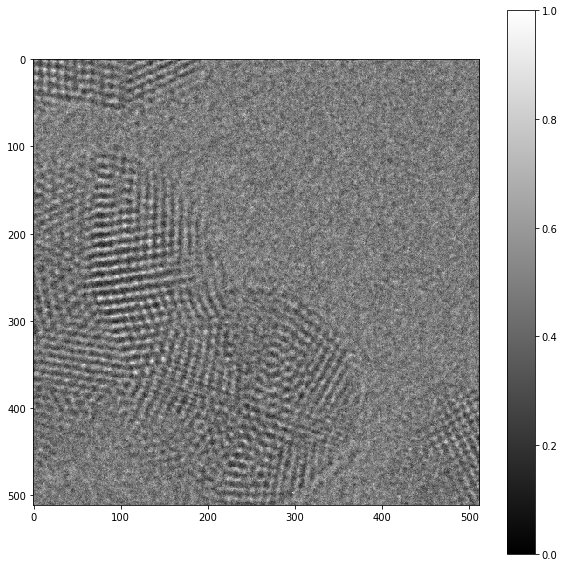

In [13]:
rdp.imm(AuDots_Filt[179])

In [ ]:
i = h5py.File('Bal_MedFilt_cutimages_20190726.h5')
i.create_dataset('images',data=AuDots_Filt)
i.close

## Create filtered CdSe data

In [15]:
#filter CdSe data
CdSeDots_Filt = rdp.median_filter_stack(CdSeDots)

In [16]:
CdSeDots_Filt.shape

(172, 512, 512, 1)

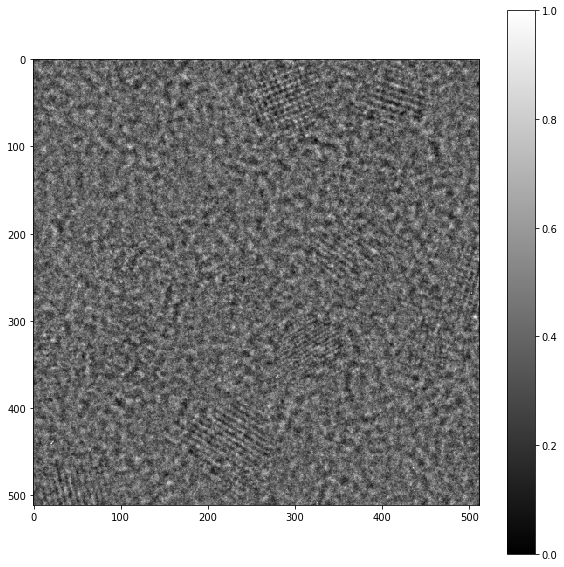

In [24]:
rdp.imm(CdSeDots_Filt[110])

In [25]:
i = h5py.File('Bal_MedFilt_CdSeRelabel512Images_20190726.h5')

In [26]:
i.create_dataset('images',data=CdSeDots_Filt)

<HDF5 dataset "images": shape (172, 512, 512, 1), type "<f8">

In [27]:
i.close()

# Create combined data set

In [16]:
shufAu, shufAuMaps = skshuffle(AuDots_Filt[:129],AuDotsMaps[:129])

In [17]:
shufCdSe, shufCdSeMaps = skshuffle(CdSeDots_Filt[:129],CdSeDotMaps[:129])

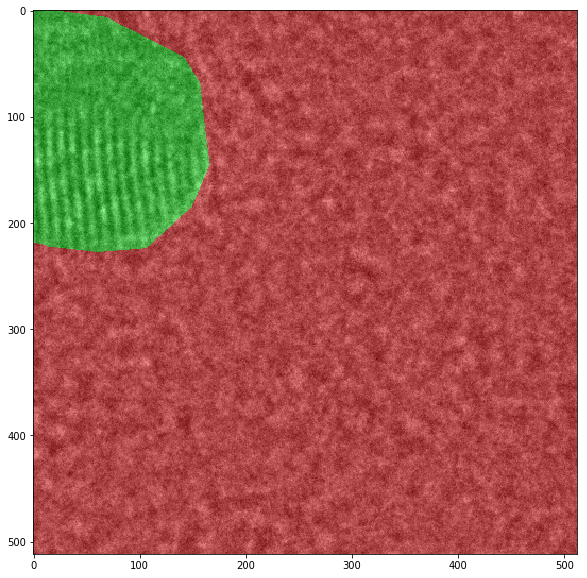

In [44]:
#check ordering
rdp.immOverlay(shufX,shufY,9)

In [47]:
min(AuDots_Filt.shape[0],CdSeDots_Filt.shape[0])

172

In [18]:
def shuffle_stacks(imgs1,maps1,imgs2,maps2,same_num = True):
    if same_num == True:
        num = min(imgs1.shape[0],imgs2.shape[0])
        imgs1 = imgs1.copy()[:num]
        imgs2 = imgs2.copy()[:num]
        maps1 = maps1.copy()[:num]
        maps2 = maps2.copy()[:num]
    total_images = np.concatenate((imgs1,imgs2),axis=0)
    total_maps = np.concatenate((maps1,maps2),axis=0)
    total_images, total_maps = skshuffle(total_images,total_maps)
    total_images, total_maps = skshuffle(total_images,total_maps)
    total_images, total_maps = skshuffle(total_images,total_maps)
    return total_images,total_maps

In [19]:
combined_images, combined_maps = shuffle_stacks(shufAu,shufAuMaps,shufCdSe,shufCdSeMaps)

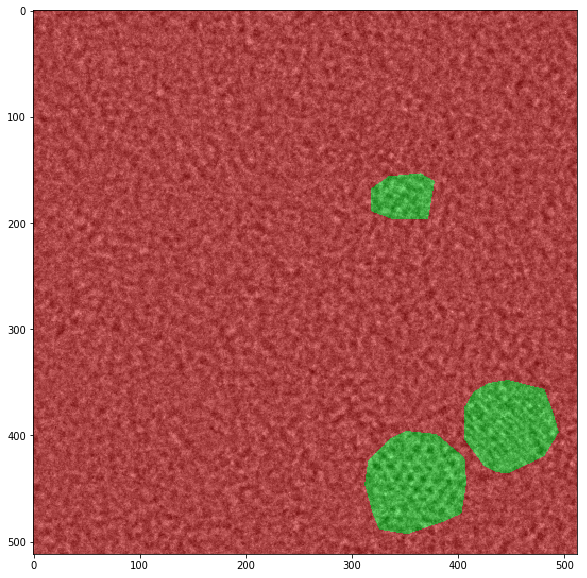

In [73]:
rdp.immOverlay(combined_images,combined_maps,6)

In [20]:
i = h5py.File('/Users/cgroschner/Documents/HTTEM/particle_data/combined_stacks/Bal_MedFilt_AuCdSeDots_20190726_v2.h5','w')

In [21]:
i.create_dataset('images',data=combined_images)

<HDF5 dataset "images": shape (258, 512, 512, 1), type "<f8">

In [22]:
i.close()

In [23]:
i = h5py.File('/Users/cgroschner/Documents/HTTEM/particle_data/combined_stacks/Bal_MedFilt_AuCdSeDots_20190726_maps_v2.h5','w')

In [24]:
i.create_dataset('maps',data=combined_maps)

<HDF5 dataset "maps": shape (258, 512, 512, 2), type "<f8">

In [25]:
i.close()